In [123]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Feature Engineering 
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
import sidetable as stb

#For creating synthetic data
from imblearn.over_sampling import SMOTE

#Model Building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
#Reading data from .csv file
glass = pd.read_csv(r"C:\Users\Viren Pai\OneDrive\Desktop\360DigiTMG\DataScience_Assignments\KNN\glass\glass.csv")

In [3]:
#shape of the dataframe
glass.shape

(214, 10)

In [4]:
#sample records
glass.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
17,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.00,0.00,3


In [5]:
#Data types of features
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
#Checking for missing values
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#Checking for duplicates
glass.duplicated().sum()

# 1 duplicate identified

1

In [8]:
#Dropping identified Duplicate
glass.drop_duplicates(inplace = True, ignore_index = True)
glass.shape

(213, 10)

In [9]:
#Cardinality of Features
glass.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [10]:
#Stats of Numerical Features
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


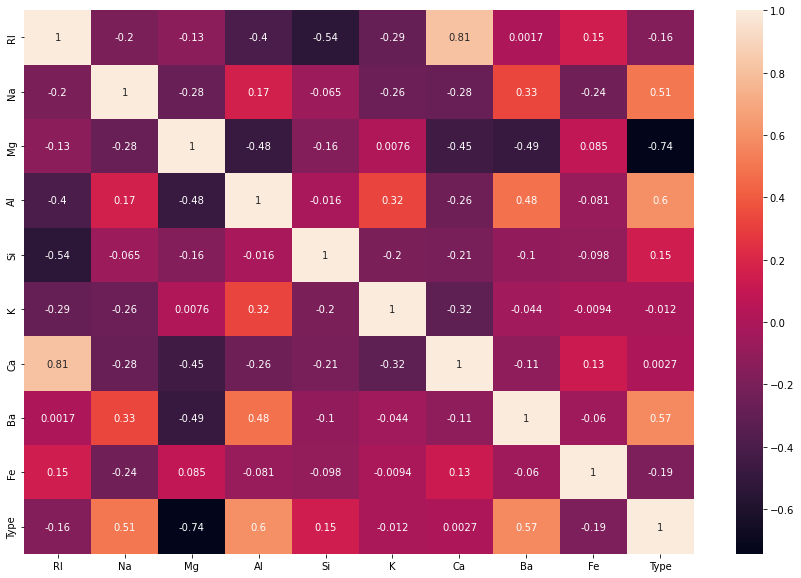

In [11]:
#Correlation plot
plt.figure(figsize = (15,10))
sns.heatmap(glass.corr(), annot = True)
plt.show()

In [12]:
#Frequency Table of target variable to check for class-imbalance
glass.stb.freq(['Type'])

#The dataset has imbalance class problem

,Type,count,percent,cumulative_count,cumulative_percent
0,2,76,35.680751,76,35.680751
1,1,69,32.394366,145,68.075117
2,7,29,13.615023,174,81.690141
3,3,17,7.981221,191,89.671362
4,5,13,6.103286,204,95.774648
5,6,9,4.225352,213,100.000000


###### Analyzing redundancy of near-zero variance features

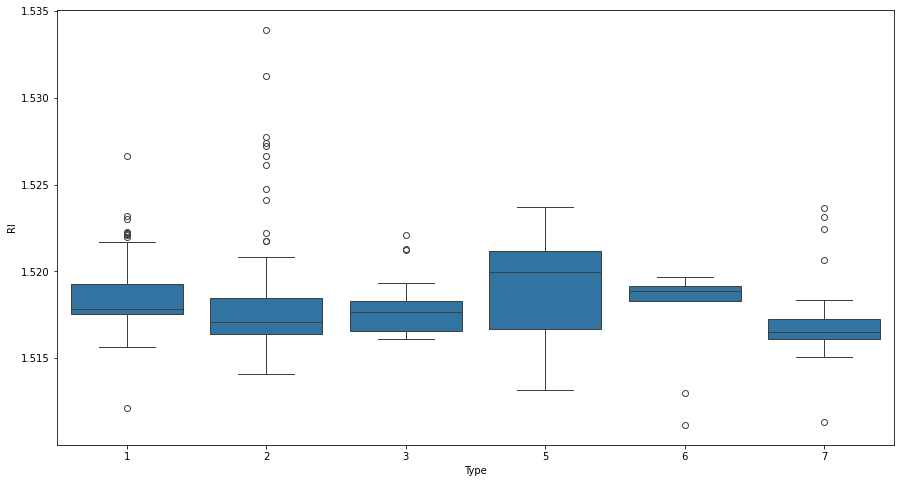

In [13]:
#Analyzing redundancy of near-zero variance feature: 'RI'
RI_data = glass.loc[:, ['Type', 'RI']]

plt.figure(figsize = (15,8))
sns.boxplot(x = 'Type', y = 'RI', data = RI_data)
plt.show()

In [14]:
#To check if the means of features across 'Type's is statistically significant

type1 = RI_data[(RI_data.Type == 1)]['RI']
type2 = RI_data[(RI_data.Type == 2)]['RI']
type3 = RI_data[(RI_data.Type == 3)]['RI']
type5 = RI_data[(RI_data.Type == 5)]['RI']
type6 = RI_data[(RI_data.Type == 6)]['RI']
type7 = RI_data[(RI_data.Type == 7)]['RI']

In [15]:
#ANOVA to test for statistical significance between the means of 'RI' across types
import scipy.stats as stats

#Null Hypothesis: There is no statistically significant difference between the means of 'RI' across 'Type's
#Alternate Hypothesis: There is at least one significant difference between the means
#level of significance: 0.05

stats.f_oneway(type1, type2, type3, type5, type6, type7)

F_onewayResult(statistic=1.55775037225545, pvalue=0.17350991394334964)

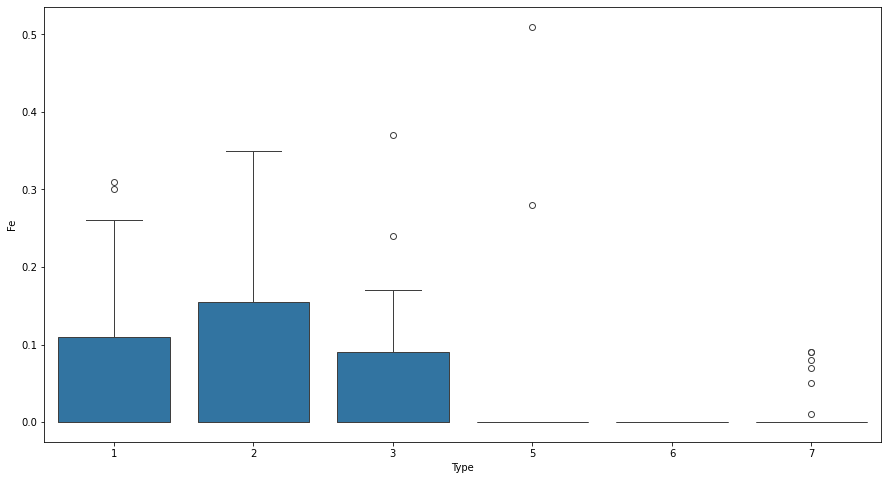

In [16]:
#Analyzing redundancy of near-zero variance feature: 'RI'
Fe_data = glass.loc[:, ['Type', 'Fe']]

plt.figure(figsize = (15,8))
sns.boxplot(x = 'Type', y = 'Fe', data = Fe_data)
plt.show()

In [17]:
#To check if the means of features across 'Type's is statistically significant

type1 = Fe_data[(Fe_data.Type == 1)]['Fe']
type2 = Fe_data[(Fe_data.Type == 2)]['Fe']
type3 = Fe_data[(Fe_data.Type == 3)]['Fe']
type5 = Fe_data[(Fe_data.Type == 5)]['Fe']
type6 = Fe_data[(Fe_data.Type == 6)]['Fe']
type7 = Fe_data[(Fe_data.Type == 7)]['Fe']

In [18]:
#Null Hypothesis: There is no statistically significant difference between the means of 'Fe' across 'Type's
#Alternate Hypothesis: There is at least one significant difference between the means
#level of significance: 0.05

stats.f_oneway(type1, type2, type3, type5, type6, type7)

F_onewayResult(statistic=2.70321282758454, pvalue=0.021686035644066383)

In [19]:
#Dropping 'RI': Concluced from ANOVA tests done above
glass.drop(['RI'], axis = 1, inplace = True)

In [20]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Na      213 non-null    float64
 1   Mg      213 non-null    float64
 2   Al      213 non-null    float64
 3   Si      213 non-null    float64
 4   K       213 non-null    float64
 5   Ca      213 non-null    float64
 6   Ba      213 non-null    float64
 7   Fe      213 non-null    float64
 8   Type    213 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 15.1 KB


###### Creating Synthetic Data through SMOTE:

In [21]:
#Separating X(independent) and y(target) variables
X = glass.iloc[:,:8]
y = glass.iloc[:,8]

In [22]:
#Stratified Splitting in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [23]:
#Dimensions of train_test_split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(149, 8) (64, 8) (149,) (64,)


In [24]:
#Peforming SMOTE on train data alone to avoid data leakage

#Increasing the proportion of Type - 7, 3, 5, 6 through SMOTE
#SMOTE - Synthetic Minority Oversampling Technique

smote_class = SMOTE(sampling_strategy = 'not majority' , random_state =  1)

#X1, y1 are resampled classes
X1_train, y1_train = smote_class.fit_resample(X_train, y_train)

In [25]:
print(X1_train.shape, y1_train.shape)
#Increase in train records from 149 to 318

(318, 8) (318,)


In [26]:
#Equal counts of each class through SMOTE resampling
y1_train.value_counts()

Type
7    53
2    53
1    53
5    53
6    53
3    53
Name: count, dtype: int64

##### Exploratory Analysis of resampled train data:

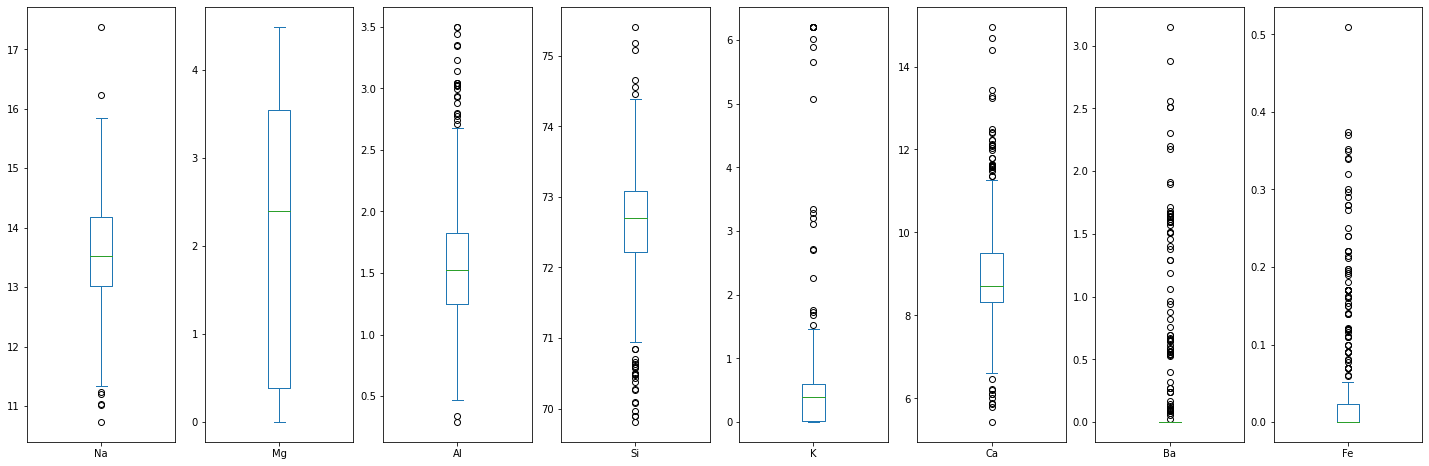

In [27]:
#Box plot to identify outliers
X1_train.plot( kind ='box', subplots = True, sharey = False, figsize = (25,8))
plt.show()

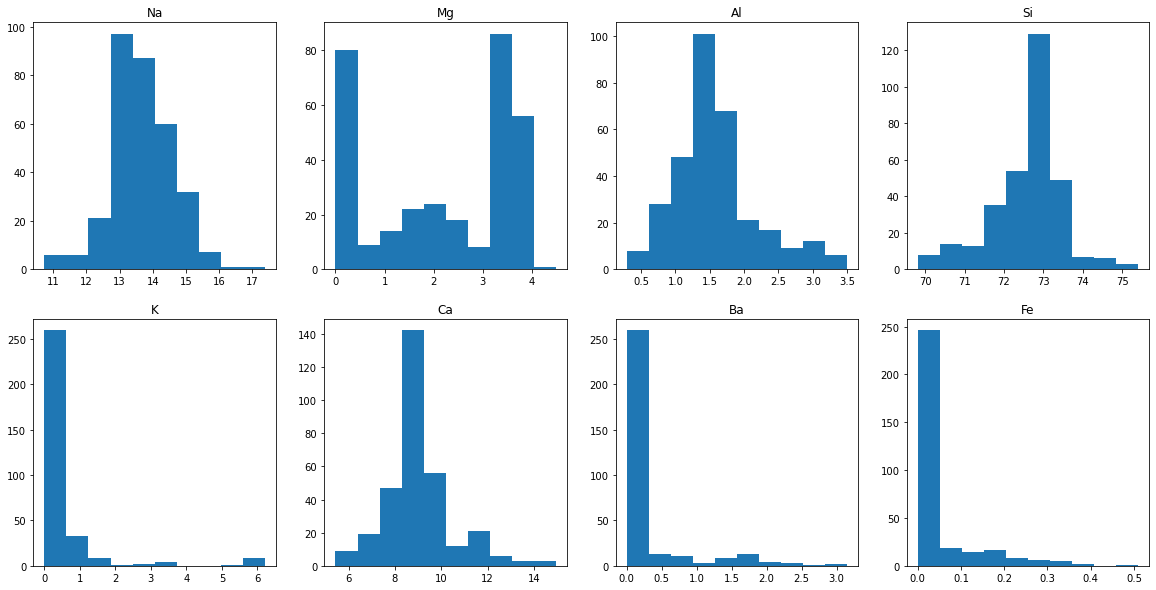

In [28]:
#Distribution plot of numerical features
cols = list(X1_train.columns)


fig1, ax1 = plt.subplots(nrows = 2,  ncols = 4, figsize = (20, 10))
for i in range(len(cols)):
    plt.subplot(2, 4, i+1)
    plt.hist(X1_train[cols[i]])
    plt.title(cols[i])

In [29]:
#Winsorization of X1_train

col_trnsf = ColumnTransformer([('winsor1', Winsorizer(capping_method='iqr', tail = 'both', fold = 1.5), ['Na', 'Al' , 'Si', 'Ca']),
                               ('winsor2', Winsorizer(capping_method='quantiles', tail = 'right', fold = 0.1), ['K', 'Ba', 'Fe'])
                              ], remainder = 'passthrough', verbose_feature_names_out = False)

In [30]:
X1_train_winsored = pd.DataFrame(col_trnsf.fit_transform(X1_train), columns = col_trnsf.get_feature_names_out())

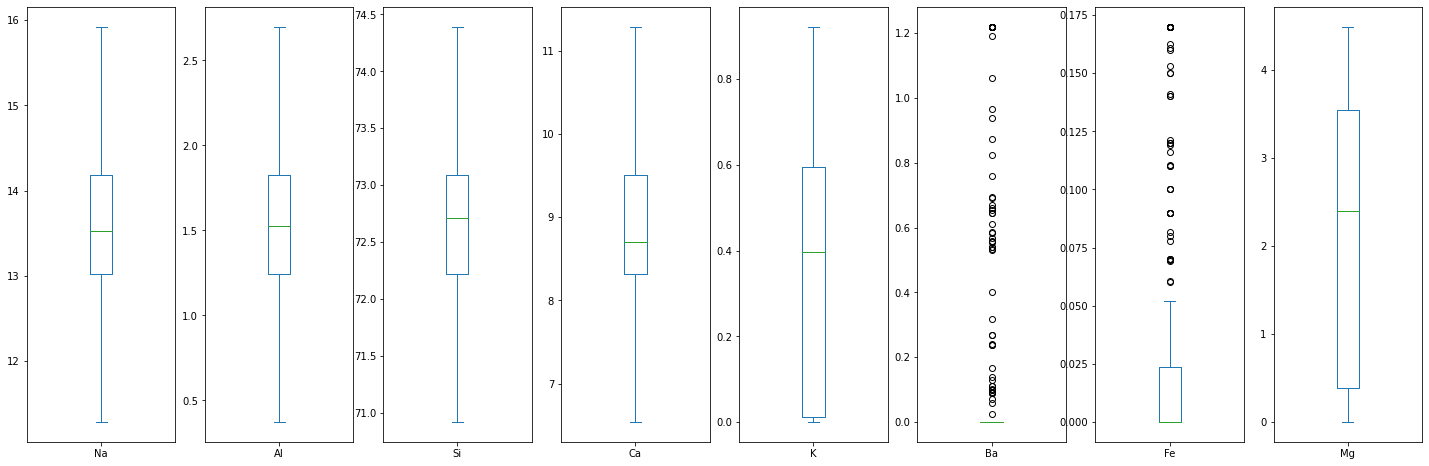

In [31]:
#Plotting winsored train data
X1_train_winsored.plot( kind ='box', subplots = True, sharey = False, figsize = (25,8))
plt.show()

In [32]:
#Normalization
normal_scaler = MinMaxScaler()
normal_scaler.fit(X1_train_winsored)

X1_train_scaled = pd.DataFrame(normal_scaler.transform(X1_train_winsored), columns = normal_scaler.get_feature_names_out())

In [33]:
X1_train_scaled

,Na,Al,Si,Ca,K,Ba,Fe,Mg
0,0.143056,0.351317,1.000000,0.503454,1.000000,0.000000,0.000000,0.000000
1,0.000000,0.170680,0.659832,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.306939,0.355618,0.656955,0.442331,0.639684,0.000000,0.000000,0.761693
3,0.373785,1.000000,0.000000,0.088242,1.000000,0.000000,0.000000,0.000000
4,0.669205,0.622273,0.559134,0.000000,1.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
313,0.780426,0.695748,0.615713,0.394038,0.000000,1.000000,0.039352,0.000000
314,0.737716,0.688952,0.623885,0.316515,0.158646,1.000000,0.000000,0.059253
315,0.777184,0.641852,0.624620,0.407130,0.136901,1.000000,0.000000,0.000000
316,0.667271,0.647986,0.607297,0.109086,1.000000,1.000000,0.000000,0.000000


<h4>Model Building: KNN Classifier</h4>

##### Model #1: Vanilla Model

In [34]:
model1 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', algorithm = 'auto') 
model1.fit(X1_train_scaled, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
#Train Results
pred1_train = model1.predict(X1_train_scaled)
accuracy_score(y1_train, pred1_train)

0.9119496855345912

In [36]:
#Data preparation of test data based on feature engineering on train data
X_test1 = pd.DataFrame(col_trnsf.transform(X_test), columns = col_trnsf.get_feature_names_out())
X_test_scaled = pd.DataFrame(normal_scaler.transform(X_test1), columns = normal_scaler.get_feature_names_out())


#Test Results:
pred1_test = model1.predict(X_test_scaled)
accuracy_score(y_test, pred1_test)

0.65625

In [37]:
print(model1.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


##### Model #2: with 'weights': 'distance'

In [38]:
model2 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'auto') 
model2.fit(X1_train_scaled, y1_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [39]:
#Train Results
pred2_train = model2.predict(X1_train_scaled)
accuracy_score(y1_train, pred2_train)

1.0

In [40]:
#Test Results:
pred2_test = model2.predict(X_test_scaled)
accuracy_score(y_test, pred2_test)

0.671875

##### Model3: With GridSearchCV to tes hyperparameters

In [102]:
KNN_class = KNeighborsClassifier()
params = {'n_neighbors': np.arange(3,10), 'weights' : ['uniform', 'distance']}

In [103]:
#Crossvalidation of 5
KNN_gs = GridSearchCV(KNN_class, params, cv = 3, return_train_score = False)

In [104]:
KNN_gs.fit(X1_train_scaled, y1_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [105]:
gscv_results = pd.DataFrame(KNN_gs.cv_results_)

In [106]:
#Best params identified out of 
KNN_gs.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [120]:
#'test' score here corresponds to 'validation' score obtained during cross validation
gscv_filtered = gscv_results.loc[:,['param_n_neighbors', 'param_weights', 'mean_test_score', 'rank_test_score']]
gscv_filtered.sort_values(by = ['rank_test_score'])

,param_n_neighbors,param_weights,mean_test_score,rank_test_score
3,4,distance,0.817610,1
5,5,distance,0.805031,2
7,6,distance,0.801887,3
1,3,distance,0.798742,4
0,3,uniform,0.792453,5
2,4,uniform,0.789308,6
9,7,distance,0.783019,7
11,8,distance,0.767296,8
4,5,uniform,0.764151,9
6,6,uniform,0.761006,10


In [108]:
#Fitlering dataframes for plotting
uniform = gscv_filtered[(gscv_filtered.param_weights == 'uniform')].iloc[:,[0,2]]
distance = gscv_filtered[(gscv_filtered.param_weights == 'distance')].iloc[:,[0,2]]

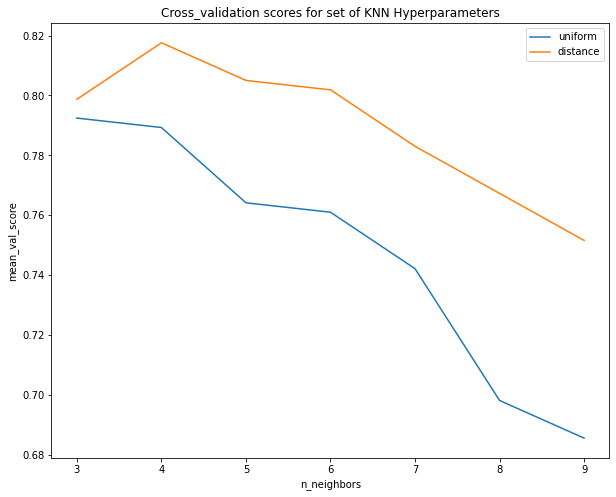

In [109]:
#Plotting 
plt.figure(figsize = (10, 8))
plt.plot(uniform.param_n_neighbors.to_numpy(), uniform.mean_test_score.to_numpy())
plt.plot(distance.param_n_neighbors.to_numpy(), distance.mean_test_score.to_numpy())
plt.legend(['uniform', 'distance'])
plt.xlabel('n_neighbors')
plt.ylabel('mean_val_score')
plt.title('Cross_validation scores for set of KNN Hyperparameters')
plt.show()


In [119]:
model3 = KNN_gs.best_estimator_

#Train Results
model3.score(X1_train_scaled, y1_train)

1.0

In [111]:
#Test Results:
pred_test = model3.predict(X_test_scaled)
accuracy_score(y_test, pred_test)

0.6875

##### Model Evaluation with confusion matrix

In [145]:
#create pivot table to identify label sequence
cm = pd.crosstab(y_test, pred_test)

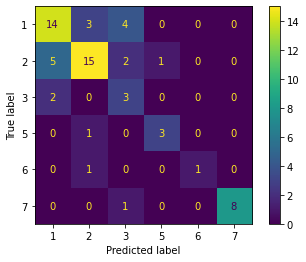

In [159]:
ConfusionMatrixDisplay(cm.values, display_labels = cm.index).plot()
plt.show()

##### Model Evaluation with classification report

In [161]:
print(classification_report(y_test, pred_test, labels = cm.index))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67        21
           2       0.75      0.65      0.70        23
           3       0.30      0.60      0.40         5
           5       0.75      0.75      0.75         4
           6       1.00      0.50      0.67         2
           7       1.00      0.89      0.94         9

    accuracy                           0.69        64
   macro avg       0.74      0.68      0.69        64
weighted avg       0.73      0.69      0.70        64

